In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4320779,80341.93,201290.00,120948.07,1096980.46,1177322.39,0.0,1.0,0.0,0.0,0.0,0.0
4320780,5819.46,120948.07,115128.61,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
4320781,78999.27,22364.00,0.00,1671495.51,1750494.78,0.0,1.0,0.0,0.0,0.0,0.0
4320782,74.15,20012.00,20086.15,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = data.dropna()
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4320778,866064.33,10453.00,0.00,0.00,866064.33,0.0,0.0,0.0,0.0,1.0,0.0
4320779,80341.93,201290.00,120948.07,1096980.46,1177322.39,0.0,1.0,0.0,0.0,0.0,0.0
4320780,5819.46,120948.07,115128.61,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
4320781,78999.27,22364.00,0.00,1671495.51,1750494.78,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
# Separate input features and target
y = data.Fraud
X = data.drop('Fraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(sampling_strategy=1.0,random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [5]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [6]:
X_train

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,-0.268106,-0.395941,-0.209875,0.220684,0.142761,1.0,0.0,0.0,0.0,0.0
1,-0.439516,-0.395941,-0.209875,-0.324912,-0.405632,0.0,0.0,1.0,0.0,1.0
2,-0.373002,2.385434,3.295020,-0.036102,-0.307984,0.0,0.0,0.0,0.0,0.0
3,-0.029357,-0.301672,-0.209875,7.527231,6.234414,0.0,0.0,0.0,1.0,0.0
4,-0.322306,-0.394723,-0.119530,-0.324912,-0.405632,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6476049,-0.298629,-0.310406,-0.209875,-0.317254,-0.313418,1.0,0.0,0.0,0.0,0.0
6476050,-0.337110,-0.333138,-0.209875,-0.278516,-0.304723,1.0,0.0,0.0,0.0,0.0
6476051,-0.421232,-0.382832,-0.209875,-0.324912,-0.392455,1.0,0.0,0.0,0.0,0.0
6476052,-0.417937,-0.380885,-0.209875,0.119856,-0.028313,1.0,0.0,0.0,0.0,0.0


In [7]:
y_train

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6476049    1.0
6476050    1.0
6476051    1.0
6476052    1.0
6476053    1.0
Name: Fraud, Length: 6476054, dtype: float64

In [8]:
# train model
rfc = RandomForestClassifier(n_estimators=30)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test, rfc_pred))
    

print(f1_score(y_test, rfc_pred))
    

print(recall_score(y_test, rfc_pred))

0.9990946087561887
0.6275704493526276
0.9025191675794085


In [9]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 0.9990946087561887


In [10]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [11]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None ,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [12]:
X_train

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,-0.268106,-0.395941,-0.209875,0.220684,0.142761,1.0,0.0,0.0,0.0,0.0
1,-0.439516,-0.395941,-0.209875,-0.324912,-0.405632,0.0,0.0,1.0,0.0,1.0
2,-0.373002,2.385434,3.295020,-0.036102,-0.307984,0.0,0.0,0.0,0.0,0.0
3,-0.029357,-0.301672,-0.209875,7.527231,6.234414,0.0,0.0,0.0,1.0,0.0
4,-0.322306,-0.394723,-0.119530,-0.324912,-0.405632,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6476049,-0.298629,-0.310406,-0.209875,-0.317254,-0.313418,1.0,0.0,0.0,0.0,0.0
6476050,-0.337110,-0.333138,-0.209875,-0.278516,-0.304723,1.0,0.0,0.0,0.0,0.0
6476051,-0.421232,-0.382832,-0.209875,-0.324912,-0.392455,1.0,0.0,0.0,0.0,0.0
6476052,-0.417937,-0.380885,-0.209875,0.119856,-0.028313,1.0,0.0,0.0,0.0,0.0


In [13]:
import pandas as pd
feature_imp = pd.Series(rcf.feature_importances_,index= X_train.columns)
feature_imp

Amount            0.192354
OldbalanceOrg     0.311047
NewbalanceOrig    0.148038
OldbalanceDest    0.046382
NewbalanceDest    0.060658
Type_CASH_OUT     0.059378
Type_DEBIT        0.000366
Type_PAYMENT      0.016401
Type_TRANSFER     0.114628
Type2_CM          0.050748
dtype: float64

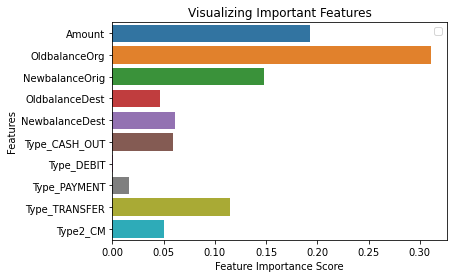

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [50]:
# Import train_test_split function
# Split dataset into features and labels
X1 =data.drop(columns = ['Type_DEBIT', 'Fraud'])
# Removed feature Type_DEBIT 
y1=data.Fraud                                     
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=27) # 75% training and 25% test

In [51]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X1_train[col_names]
features_test = X1_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X1_train[col_names] = features_train
X1_test[col_names] =features_test

In [58]:
X1_train

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Type_CASH_OUT,Type_PAYMENT,Type_TRANSFER,Type2_CM
979439,0.192399,-0.288512,-0.292266,0.077802,0.122416,1.0,0.0,0.0,0.0
678052,-0.271308,-0.288512,-0.292266,-0.377592,-0.372573,0.0,1.0,0.0,1.0
1640173,-0.091371,2.378826,2.381520,-0.136530,-0.284434,0.0,0.0,0.0,0.0
445575,0.838279,-0.198108,-0.292266,6.176367,5.620851,0.0,0.0,1.0,0.0
635793,0.045776,-0.287344,-0.223345,-0.377592,-0.372573,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2440729,-0.085260,0.103177,0.135249,-0.258191,-0.306381,0.0,0.0,0.0,0.0
3503397,-0.268425,9.202133,9.083907,-0.268401,-0.279084,0.0,0.0,0.0,0.0
3684895,-0.209425,-0.288512,-0.292266,-0.070718,-0.087981,1.0,0.0,0.0,0.0
560968,-0.269673,-0.272908,-0.279379,-0.377592,-0.372573,0.0,1.0,0.0,1.0


In [59]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X1_train,y1_train)

# prediction on test set
y_pred1=rcf.predict(X1_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))

Accuracy: 0.999751896877974


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred1)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1079283
         1.0       0.97      0.73      0.83       913

    accuracy                           1.00   1080196
   macro avg       0.99      0.86      0.92   1080196
weighted avg       1.00      1.00      1.00   1080196



In [61]:
cm = confusion_matrix(y1_test,y_pred1)
cm

array([[1079264,      19],
       [    249,     664]])

Text(69.0, 0.5, 'Fraud')

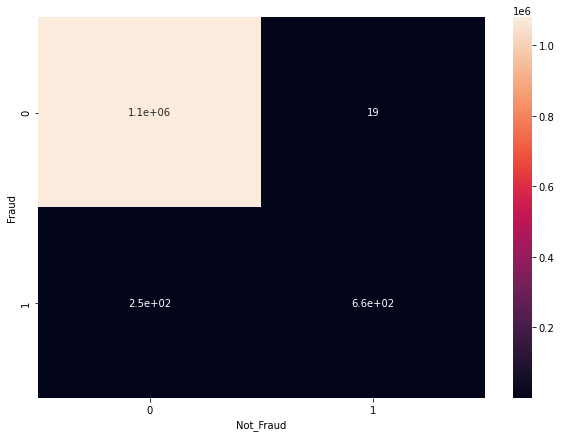

In [62]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Not_Fraud')
plt.ylabel('Fraud')